# 1. Cargamos las librerías

In [31]:
from pprint import pprint
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.axes as ax
import seaborn as sns
import plotly.express as px
import scipy
from scipy import stats
import os
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.subplots as su
from sklearn.linear_model import LinearRegression

# 2. Cargamos los datos extraídos por ciudades entre 2021 y 2025:

## - Pontevedra 

In [13]:
# Creamos una función para añadir una columna con las estaciones a los dataframes
def estacion(m):
    if   m in [12, 1, 2]: return "Invierno"
    elif m in [3, 4, 5]:  return "Primavera"
    elif m in [6, 7, 8]:  return "Verano"
    else:                 return "Otoño"

In [16]:
df_ponte = pd.concat(objs = [pd.read_csv(x) for x in os.listdir() if x.startswith("ponte") and x.endswith(".csv")],
                     ignore_index = True)

df_ponte = df_ponte.drop(labels = "Unnamed: 0", axis = 1)

df_ponte["Fecha"] = df_ponte["Fecha"].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))
df_ponte["Year"] = df_ponte["Fecha"].apply(lambda x : x.year)
df_ponte["Estacion"] = df_ponte["Fecha"].dt.month.apply(estacion)
df_ponte["Mes"] = df_ponte["Fecha"].apply(lambda x : x.month)

rename_columns = {"Momento (UNIX) de la vel. máx. del veinto" : "Momento (UNIX) de la vel. máx. del viento",
                  "Profundidad de la neive" : "Profundidad de la nieve",
                  "Vel. ráfaga de viento max." : "Vel. ráfaga de viento máx."}

df_ponte = df_ponte.rename(columns = rename_columns)

#df_ponte

## - A Coruña

In [18]:
df_coruña = pd.concat(objs = [pd.read_csv(x) for x in os.listdir() if x.startswith("coruña") and x.endswith(".csv")],
                     ignore_index = True)

df_coruña = df_coruña.drop(labels = "Unnamed: 0", axis = 1)

df_coruña["Fecha"] = df_coruña["Fecha"].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))

df_coruña["Year"] = df_coruña["Fecha"].apply(lambda x : x.year)
df_coruña["Estacion"] = df_coruña["Fecha"].dt.month.apply(estacion)
df_coruña["Mes"] = df_coruña["Fecha"].apply(lambda x : x.month)

rename_columns = {"Momento (UNIX) de la vel. máx. del veinto" : "Momento (UNIX) de la vel. máx. del viento",
                  "Profundidad de la neive" : "Profundidad de la nieve",
                  "Vel. ráfaga de viento max." : "Vel. ráfaga de viento máx."}

df_coruña = df_coruña.rename(columns = rename_columns)

#df_coruña

## - Caldes de Montbui

In [8]:
df_caldes = pd.concat(objs = [pd.read_csv(x) for x in os.listdir() if x.startswith("caldes") and x.endswith(".csv")],
                     ignore_index = True)

df_caldes = df_caldes.drop(labels = "Unnamed: 0", axis = 1)

df_caldes["Fecha"] = df_caldes["Fecha"].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))

df_caldes["Year"] = df_caldes["Fecha"].apply(lambda x : x.year)

df_caldes = df_caldes.rename(columns = rename_columns)

#df_caldes

## - Palma del Río

In [20]:
df_palmadr = pd.concat(objs = [pd.read_csv(x) for x in os.listdir() if x.startswith("palmadr") and x.endswith(".csv")],
                     ignore_index = True)

df_palmadr = df_palmadr.drop(labels = "Unnamed: 0", axis = 1)

df_palmadr["Fecha"] = df_palmadr["Fecha"].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))

df_palmadr["Year"] = df_palmadr["Fecha"].apply(lambda x : x.year)
df_palmadr["Mes"] = df_palmadr["Fecha"].apply(lambda x : x.month)
df_palmadr["Estacion"] = df_palmadr["Fecha"].dt.month.apply(estacion)

rename_columns = {"Momento (UNIX) de la vel. máx. del veinto" : "Momento (UNIX) de la vel. máx. del viento",
                  "Profundidad de la neive" : "Profundidad de la nieve",
                  "Vel. ráfaga de viento max." : "Vel. ráfaga de viento máx."}

df_palmadr = df_palmadr.rename(columns = rename_columns)

#df_palmadr

# 3. Hacemos un DataFrame con todo usando la concatenación

In [23]:
df_conjunto = pd.concat(objs = [pd.read_csv(x) for x in os.listdir() if x.startswith("df_") and x.endswith(".csv")],
                     ignore_index = True)
df_conjunto = df_conjunto.drop(labels = "Unnamed: 0", axis = 1)
#df_conjunto.to_csv("df_conjunto.csv")

#df_conjunto

# 4. Preguntas

### 1. ¿Hace más viento en el norte o en el sur de Galicia? 

In [24]:
# Respuesta:
viento = df.groupby(by = "Ciudad").agg({"Media de la vel. del viento (m/s)": "mean"})
viento_AC = viento.loc["A Coruña"]
print("- El viento en A Coruña es: ", viento_AC[0], "m/s")
viento_P = viento.loc["Pontevedra"]
print("- El viento en Pontevedra es: ", viento_P[0], "m/s")

if viento_AC[0] > viento_P[0]:
    print ("Hace más viento en el norte")
elif viento_AC[0] == viento_P[0]:
    print("Hace el mismo viento en ambos lugares")
else:
    print("Hace más viento en el sur")

- El viento en A Coruña es:  3.460164271047228 m/s
- El viento en Pontevedra es:  1.9745379876796716 m/s
Hace más viento en el norte


/var/folders/61/713tbj6n3456mfmkb75f3j8r0000gn/T/ipykernel_39764/2030070441.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("- El viento en A Coruña es: ", viento_AC[0], "m/s")
/var/folders/61/713tbj6n3456mfmkb75f3j8r0000gn/T/ipykernel_39764/2030070441.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("- El viento en Pontevedra es: ", viento_P[0], "m/s")
/var/folders/61/713tbj6n3456mfmkb75f3j8r0000gn/T/ipykernel_39764/2030070441.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

In [25]:
# Gráfica de apoyo:

**4. ¿La temperatura y la humedad influyen en el punto de rocío?** 

## Caldes de Montbui


Para ver esto haremos regresión lineal múltiple:

In [33]:
X = df_caldes[["Media de la temperatura", "Media humedad"]]
Y = df_caldes["Media punto de rocío"]

model = LinearRegression()
model.fit(X, Y)

print("Intercept:", model.intercept_)
print("Coeficientes:", model.coef_)
print("R²:", model.score(X, Y))

Intercept: -22.85649697134692
Coeficientes: [0.95251471 0.25107619]
R²: 0.9943408473773464


**Interpretación de los datos:**
Podemos sacar varias conclusiones que físicamente tienen mucho sentido. 
Lo primero, el valor obtenido de los coeficientes indica que el punto de rocío está determinado casi linealmente sobre todo por la temperatura (coeficiente = 0.95251471) y en menor medida por la humedad (coeficiente= 0.25107619).
La temperatura es la variable principal que controla la capacidad del aire para saturarse y la humedad se encarga de regular.

## Pontevedra

### Comparación de temperaturas máxima, media y mínima entre 2021 y 2025 por ciudades

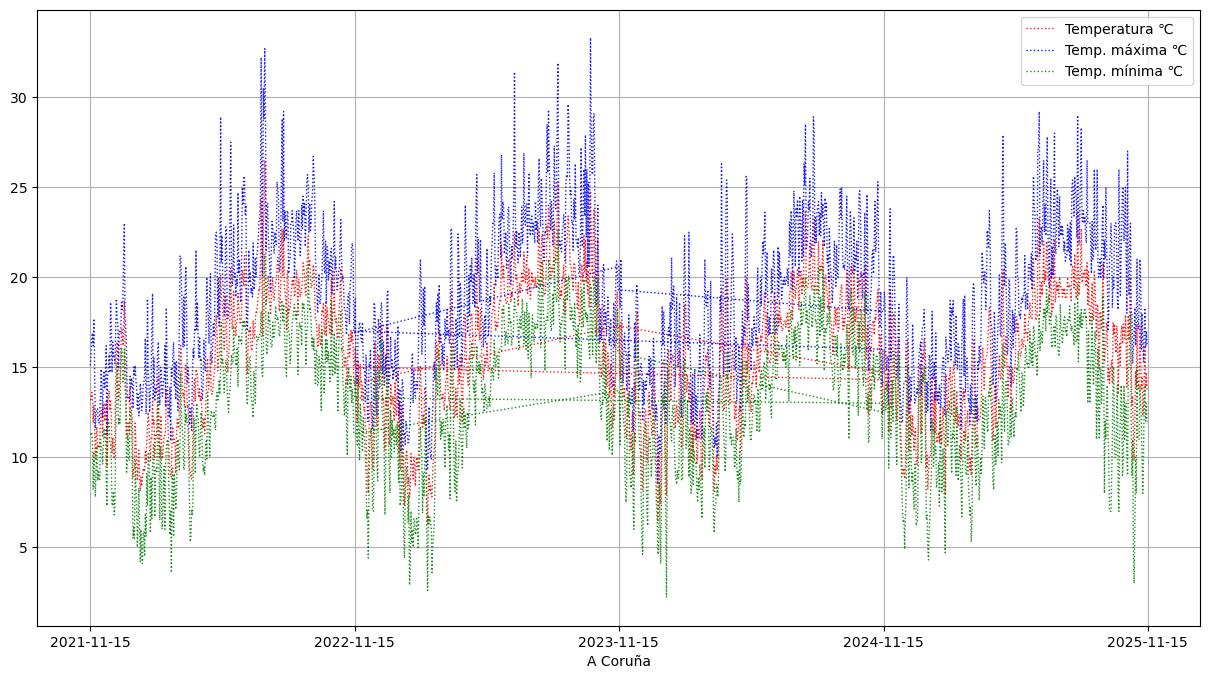

In [26]:
X = df_coruña["Fecha"]
Y1 = df_coruña["Media de la temperatura"]
Y2 = df_coruña["Temperatura máxima"]
Y3 = df_coruña["Temperatura mínima"]

colores = ["red", "blue", "green"]

plt.figure(figsize = (15, 8))

plt.plot(X,
         Y1, 
         color       = "red",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temperatura ℃") 

plt.plot(X,
         Y2, 
         color       = "blue",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. máxima ℃") 

plt.plot(X,
         Y3, 
         color       = "green",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. mínima ℃") 


plt.xlabel("A Coruña")
plt.legend()
plt.xticks([18_946, 19_311, 19_676, 20_042, 20_407])
plt.grid()
plt.show()

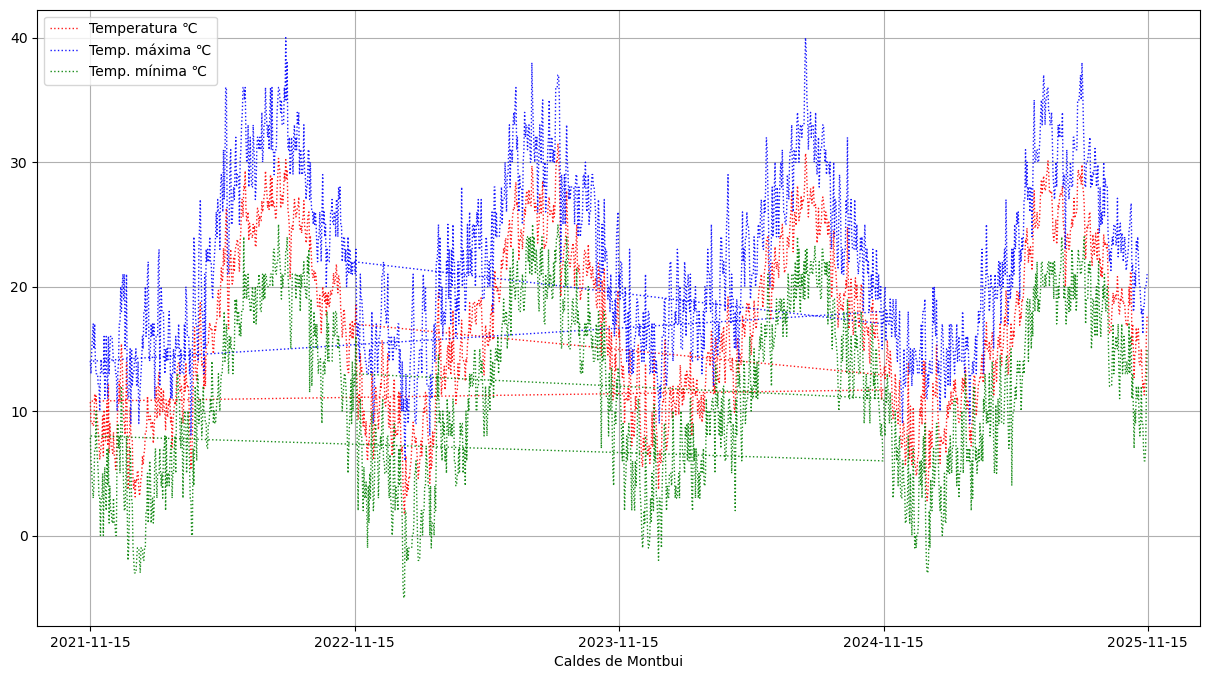

In [27]:
X = df_caldes["Fecha"]
Y1 = df_caldes["Media de la temperatura"]
Y2 = df_caldes["Temperatura máxima"]
Y3 = df_caldes["Temperatura mínima"]

colores = ["red", "blue", "green"]

plt.figure(figsize = (15, 8))

plt.plot(X,
         Y1, 
         color       = "red",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temperatura ℃") 

plt.plot(X,
         Y2, 
         color       = "blue",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. máxima ℃") 

plt.plot(X,
         Y3, 
         color       = "green",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. mínima ℃") 


plt.xlabel("Caldes de Montbui")
plt.legend()
plt.xticks([18_946, 19_311, 19_676, 20_042, 20_407])
plt.grid()
plt.show()

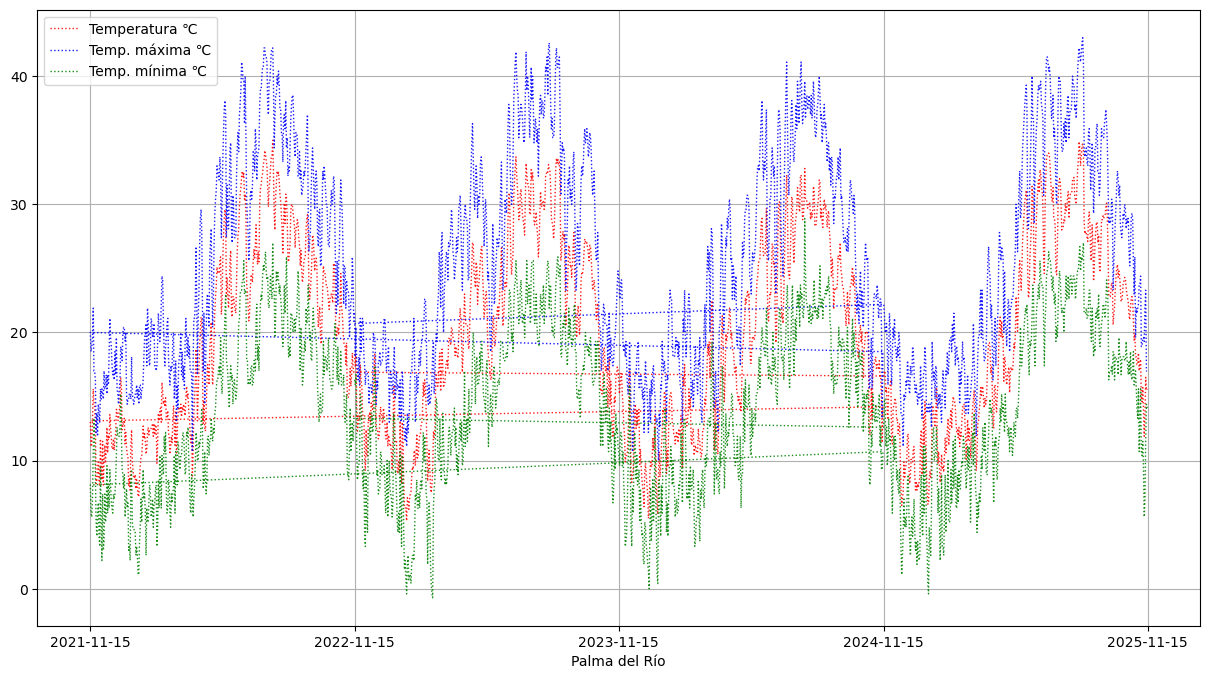

In [28]:
X = df_palmadr["Fecha"]
Y1 = df_palmadr["Media de la temperatura"]
Y2 = df_palmadr["Temperatura máxima"]
Y3 = df_palmadr["Temperatura mínima"]

colores = ["red", "blue", "green"]

plt.figure(figsize = (15, 8))

plt.plot(X,
         Y1, 
         color       = "red",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temperatura ℃") 

plt.plot(X,
         Y2, 
         color       = "blue",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. máxima ℃") 

plt.plot(X,
         Y3, 
         color       = "green",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. mínima ℃") 


plt.xlabel("Palma del Río")
plt.legend()
plt.xticks([18_946, 19_311, 19_676, 20_042, 20_407])
plt.grid()
plt.show()

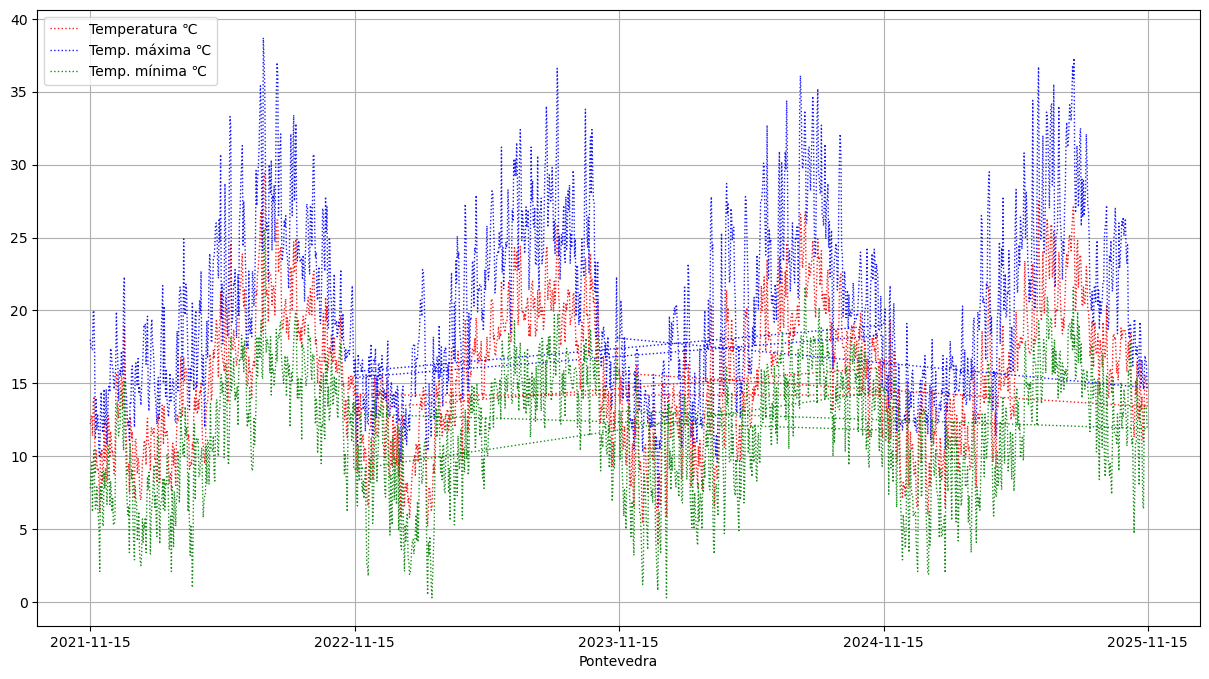

In [29]:
X = df_ponte["Fecha"]
Y1 = df_ponte["Media de la temperatura"]
Y2 = df_ponte["Temperatura máxima"]
Y3 = df_ponte["Temperatura mínima"]

colores = ["red", "blue", "green"]

plt.figure(figsize = (15, 8))

plt.plot(X,
         Y1, 
         color       = "red",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temperatura ℃") 

plt.plot(X,
         Y2, 
         color       = "blue",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. máxima ℃") 

plt.plot(X,
         Y3, 
         color       = "green",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. mínima ℃") 


plt.xlabel("Pontevedra")
plt.legend()
plt.xticks([18_946, 19_311, 19_676, 20_042, 20_407])
plt.grid()
plt.show()

### b) Evolución de la temperatura media, máxima y mínima en este período

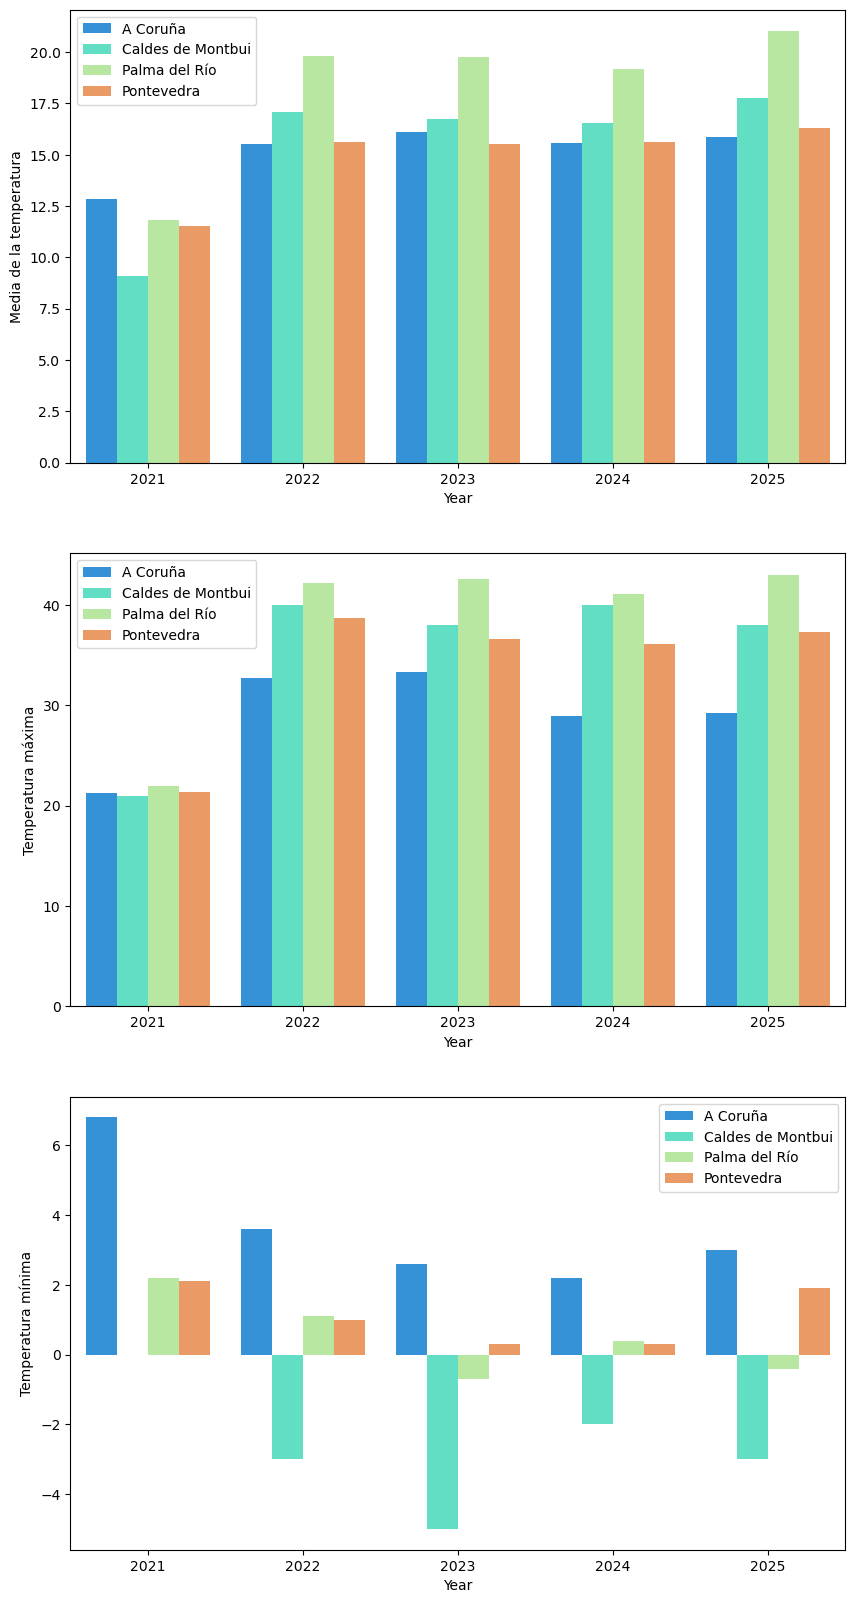

In [115]:
plt.figure(figsize = (10,20))

plt.subplot(3, 1, 1) 
sns.barplot(x = "Year", 
            y = "Media de la temperatura", 
            hue = "Ciudad", 
            data = df.groupby(by = ["Year", "Ciudad"]).agg({"Media de la temperatura": "mean"}), 
            palette = "rainbow")
plt.yticks([-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

plt.legend(loc="upper left",
           fontsize=10)

plt.subplot(3, 1, 2)
sns.barplot(x = "Year", 
            y = "Temperatura máxima", 
            hue = "Ciudad", 
            data = df.groupby(by = ["Year", "Ciudad"]).agg({"Temperatura máxima": "max"}), 
            palette = "rainbow")
plt.yticks([-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

plt.legend(loc="upper left",
           fontsize=10)

plt.subplot(3,1, 3)
sns.barplot(x = "Year", 
            y = "Temperatura mínima", 
            hue = "Ciudad", 
            data = df.groupby(by = ["Year", "Ciudad"]).agg({"Temperatura mínima": "min"}), 
            palette = "rainbow")
plt.yticks([-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

plt.legend(loc="upper right",
           fontsize=10)

plt.show()

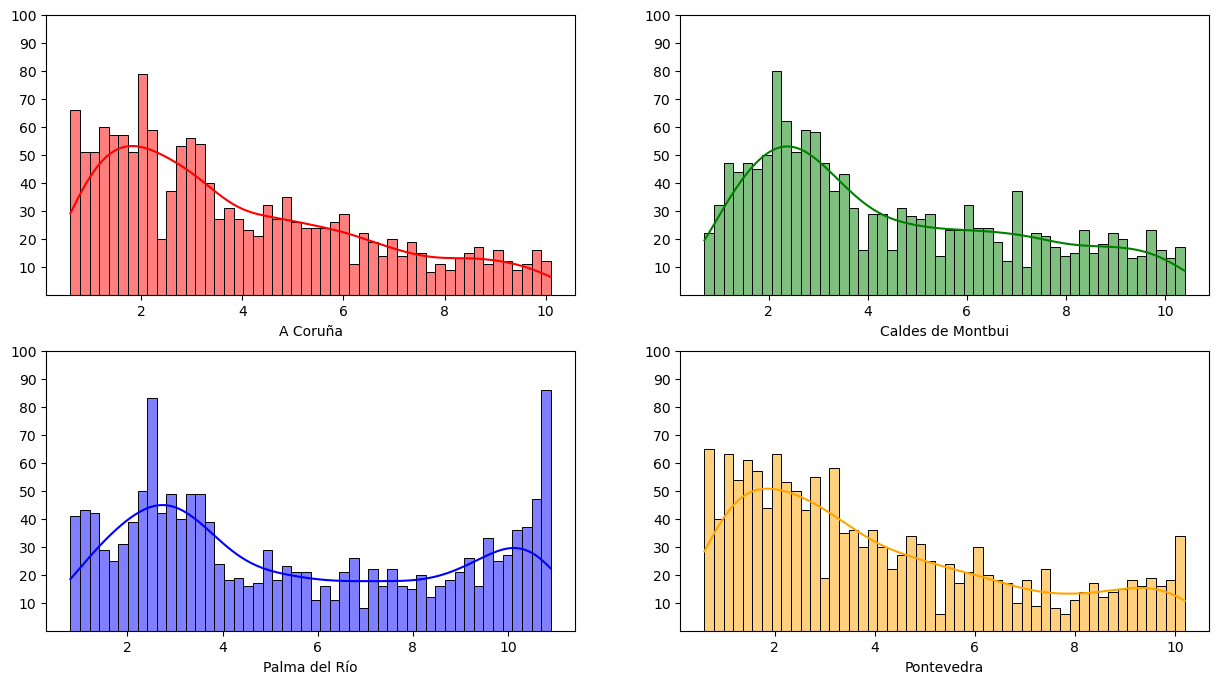

In [132]:
plt.figure(figsize = (15, 8))

plt.subplot(2, 2, 1)  
sns.histplot(df_coruña["Índice máximo de rayos ultravioleta"],
             color = "red",
             bins = 50,
             kde = True)
plt.xlabel("A Coruña")
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel("")

plt.subplot(2, 2, 2)  
sns.histplot(df_caldes["Índice máximo de rayos ultravioleta"],
             color = "green",
             bins = 50,
             kde = True)
plt.xlabel("Caldes de Montbui")
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel("")

plt.subplot(2, 2, 3)  
sns.histplot(df_palmadr["Índice máximo de rayos ultravioleta"],
             color = "blue",
             bins = 50,
             kde = True)
plt.xlabel("Palma del Río")
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel("")

plt.subplot(2, 2, 4)  
sns.histplot(df_ponte["Índice máximo de rayos ultravioleta"],
             color = "orange",
             bins = 50,
             kde = True)
plt.xlabel("Pontevedra")
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel("")

plt.show()

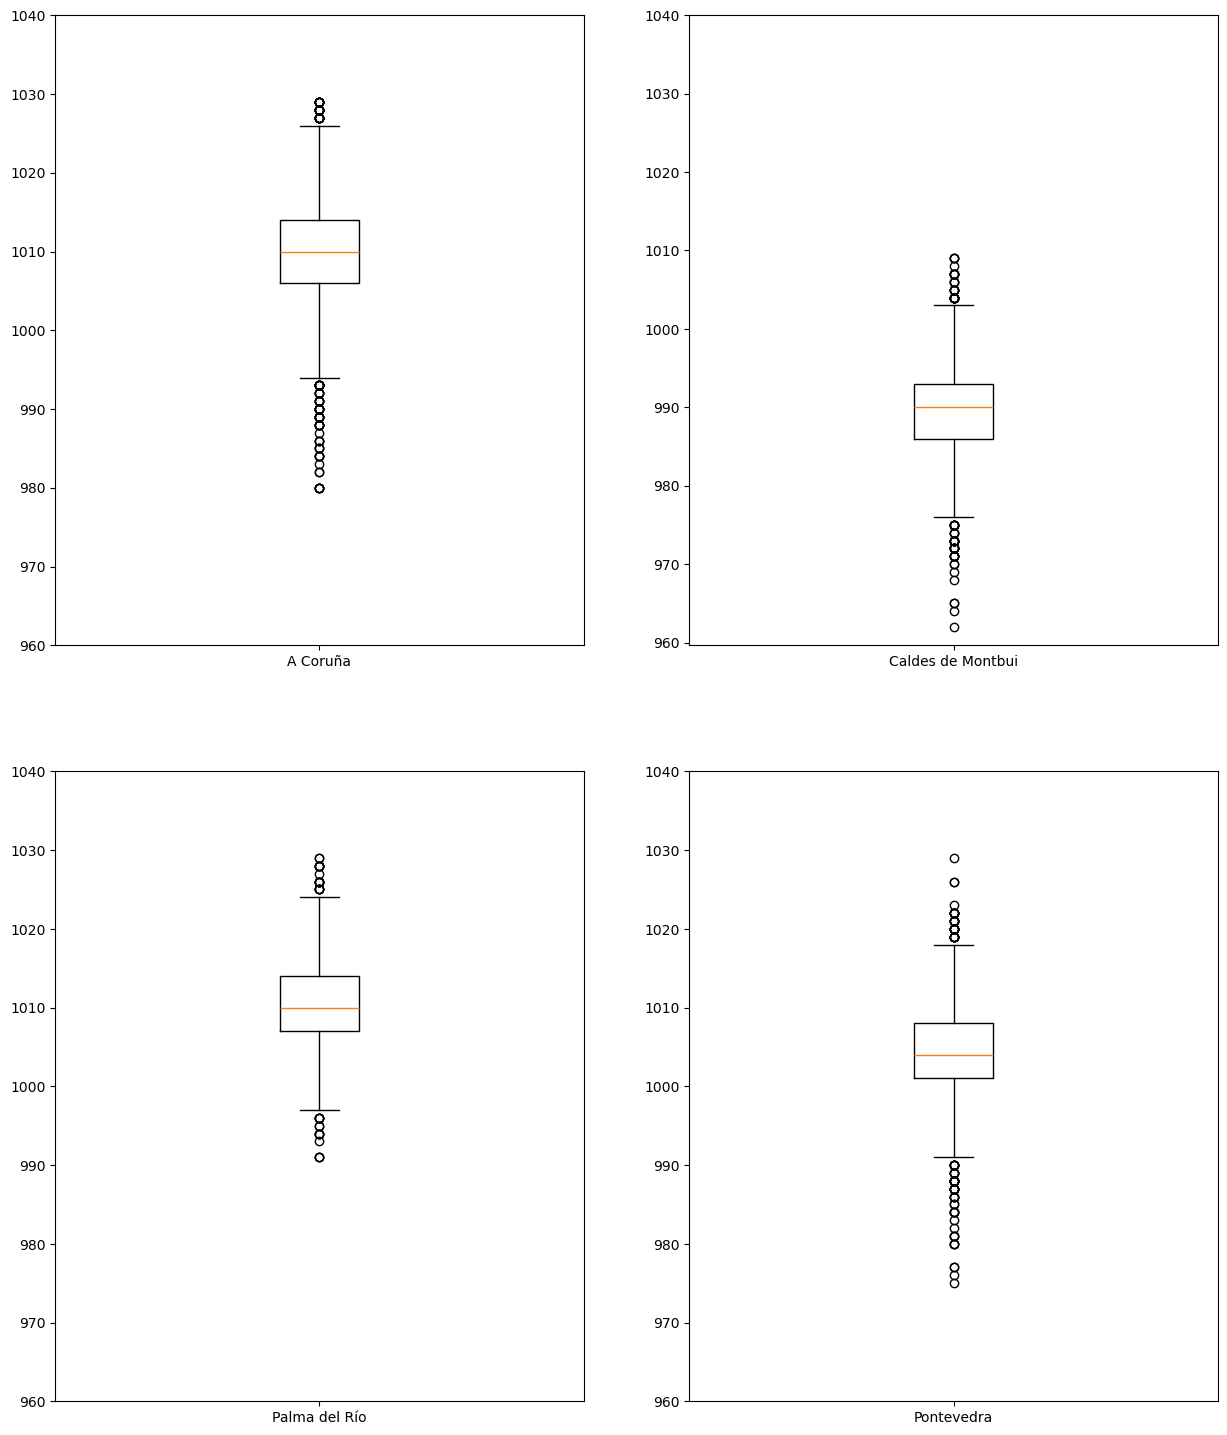

In [227]:
plt.figure(figsize = (15, 18))

plt.subplot(2, 2, 1)  
plt.boxplot(x = df_coruña["Presión atmosférica"],
            tick_labels = ["A Coruña"])
plt.yticks([960, 970, 980, 990, 1_000, 1_010, 1_020, 1_030, 1_040])
plt.ylabel("")

plt.subplot(2, 2, 2) 
plt.boxplot(x = df_caldes["Presión atmosférica"],
            tick_labels = ["Caldes de Montbui"])
plt.yticks([960, 970, 980, 990, 1_000, 1_010, 1_020, 1_030, 1_040])
plt.ylabel("")

plt.subplot(2, 2, 3) 
plt.boxplot(x = df_palmadr["Presión atmosférica"],
            tick_labels = ["Palma del Río"])
plt.yticks([960, 970, 980, 990, 1_000, 1_010, 1_020, 1_030, 1_040])
plt.ylabel("")

plt.subplot(2, 2, 4)  
plt.boxplot(x = df_ponte["Presión atmosférica"],
            tick_labels = ["Pontevedra"])
plt.yticks([960, 970, 980, 990, 1_000, 1_010, 1_020, 1_030, 1_040])
plt.ylabel("")

plt.show()